### Non-negative matrix factorization

- dimension reduction
- interpretable (unlike PCA)
- all sample features must be non-negative

NMF expresses documents as combinations of topics, images as combination of patterns


In [2]:
from sklearn.decomposition import NMF

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

csr = tfidf.fit_transform(['INSTRUCTIONS 100XP',
'Import TfidfVectorizer from sklearn.feature_extraction.text.',
'Create a TfidfVectorizer instance called tfidf.',
'Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.',
'Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.',
'The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.'])

words = tfidf.get_feature_names()
words[:4]

['100xp', 'and', 'apply', 'array']

In [4]:
model = NMF(n_components=3)

In [5]:
model.fit(csr)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=3, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

Features can be used to reconstruct the samples

In [6]:
nmf_features = model.transform(csr)
nmf_features

array([[0.        , 0.        , 1.        ],
       [0.        , 0.73715549, 0.        ],
       [0.02273933, 0.73104802, 0.        ],
       [0.68738356, 0.01115013, 0.        ],
       [0.53375894, 0.        , 0.        ],
       [0.69457824, 0.        , 0.        ]])

In [7]:
csr.toarray()[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4198708 , 0.        , 0.        , 0.        ,
       0.        , 0.4198708 , 0.        , 0.        , 0.        ,
       0.4198708 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4198708 , 0.4198708 , 0.        ,
       0.34430007, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Dimension of components = dimension of samples

In [8]:
model.components_

array([[0.        , 0.23443291, 0.13267166, 0.18201299, 0.18201299,
        0.11665981, 0.16888304, 0.00248152, 0.16888304, 0.08929153,
        0.08929153, 0.00248152, 0.20445538, 0.13267166, 0.13267166,
        0.11665981, 0.        , 0.13267166, 0.11665981, 0.13267166,
        0.13267166, 0.        , 0.08929153, 0.08929153, 0.11665981,
        0.        , 0.13267166, 0.11665981, 0.00248152, 0.        ,
        0.13267166, 0.11665981, 0.08929153, 0.23443291, 0.32845366,
        0.11665981, 0.23443291, 0.        , 0.        , 0.15542011,
        0.        , 0.48170345, 0.20445538, 0.36402599, 0.11665981,
        0.13267166, 0.26787459, 0.11665981],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33277847, 0.        , 0.        ,
        0.        , 0.33277847, 0.        , 0.        , 0.        ,
        0.        , 0.28712975, 0.        , 0.        , 0.        ,
        0.        , 0.28712975, 0.        , 0.        , 0.        ,
   

In [84]:
from sklearn.preprocessing import normalize

In [85]:
norm_features = normalize(nmf_features)

In [92]:
current_line = norm_features[-2, :]
current_line

array([1., 0., 0.])

In [91]:
similarities = norm_features.dot(current_line)
similarities

array([0.        , 0.        , 0.03109008, 0.99986846, 1.        ,
       1.        ])

In [96]:
import pandas as pd

In [97]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=words[:6])

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['array']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

array     1.000000
assign    0.999868
been      0.999868
apply     0.047297
and       0.016219
dtype: float64


In [102]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=3)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(csr)

In [103]:
norm_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41405151e-01, 0.00000000e+00, 9.89951809e-01],
       [6.52945839e-01, 0.00000000e+00, 7.57404602e-01],
       [9.99999756e-01, 6.98398052e-04, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.68589844e-04, 9.99999838e-01]])

#### Sample reconstruction

- multiply components by feature values and add up


In [9]:
import numpy as np
print(np.__version__)

1.15.4


In [10]:
sample = np.array([0,1,0.5,1,0,1])

In [11]:
bitmap = sample.reshape((2,3))

In [12]:
import matplotlib.pyplot as plt

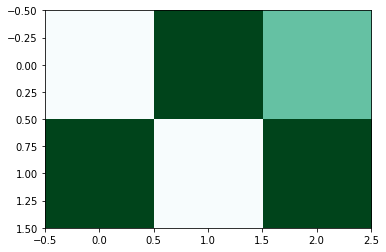

In [13]:
plt.imshow(bitmap, cmap='BuGn', interpolation='nearest')

In [14]:
from skimage import io
from skimage import color

In [59]:
img = color.rgb2gray(io.imread('2vEPKrC-qOc.jpg'))

In [66]:
img = img[:,:500]

In [67]:
img.shape

(258, 500)

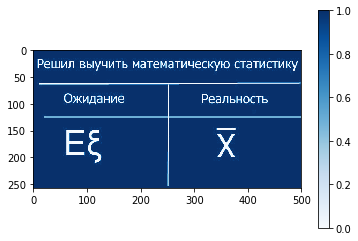

In [68]:
plt.imshow(img, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()

In [69]:
def show_as_image(sample):
    bitmap = sample.reshape((20, 25))
    plt.figure()
    plt.imshow(bitmap, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.show()

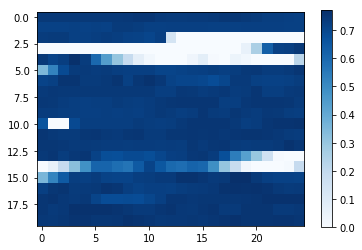

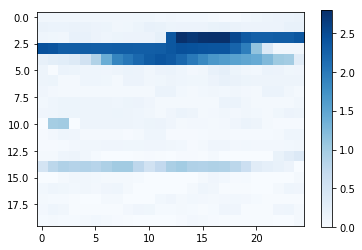

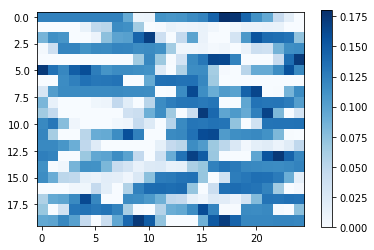

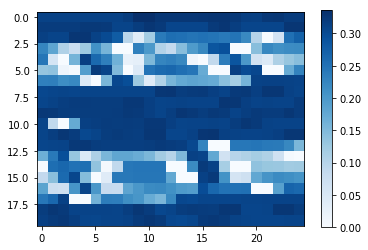

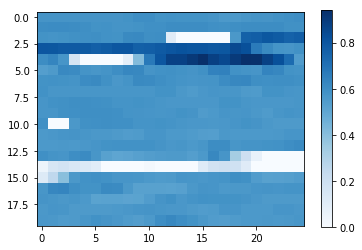

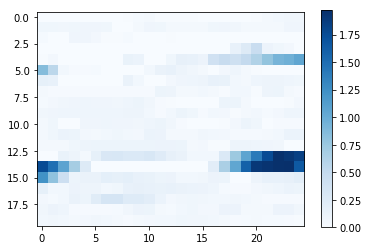

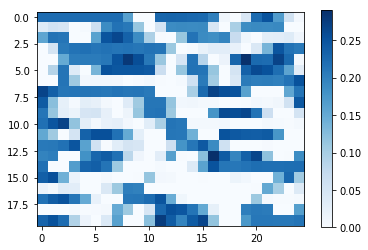

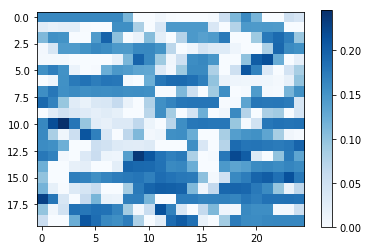

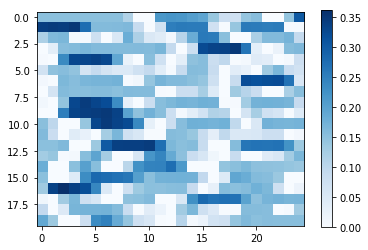

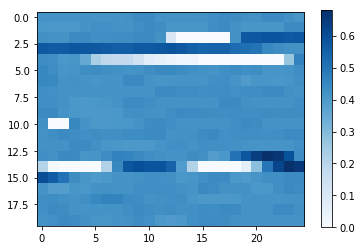

In [71]:
# Create an NMF model: model
model = NMF(n_components=10)

# Apply fit_transform to samples: features
features = model.fit_transform(img)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [73]:
model.components_.shape

(10, 500)

In [74]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]
print(digit_features)

[1.07112154 0.34928646 0.26706337 0.03980115 0.1687297  0.43447334
 0.0821087  0.15951024 0.00790895 0.        ]


In [36]:
features[0,:]

array([1.07279015, 0.34975841, 0.26027576, 0.0396519 , 0.1681718 ,
       0.43406811, 0.08121196, 0.16038432, 0.00846573, 0.        ])

#### PCA doesn't learn parts

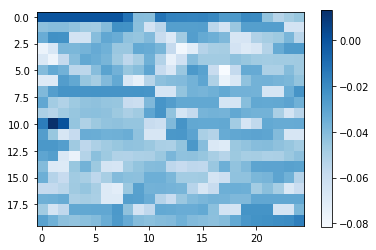

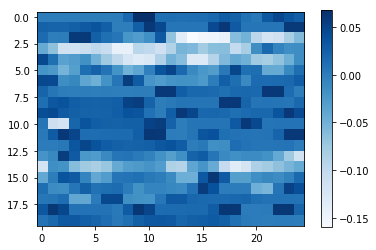

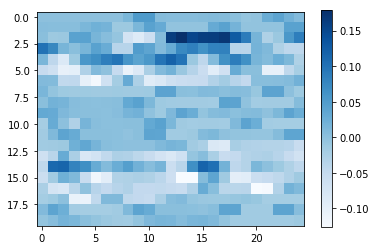

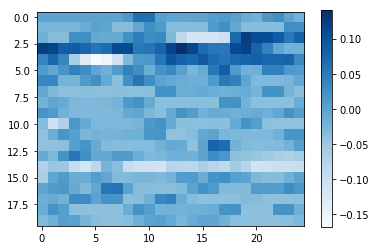

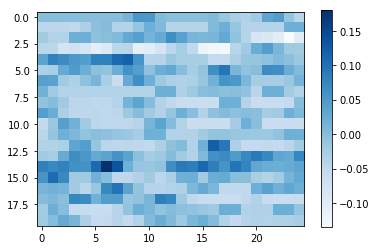

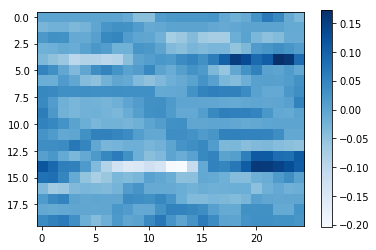

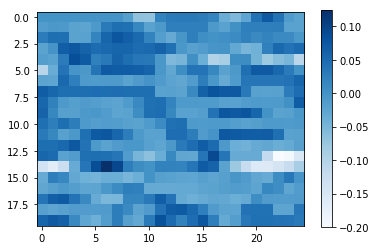

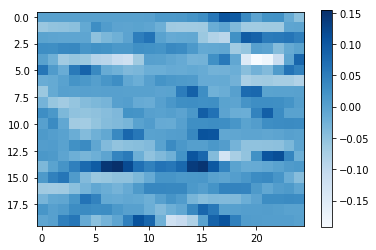

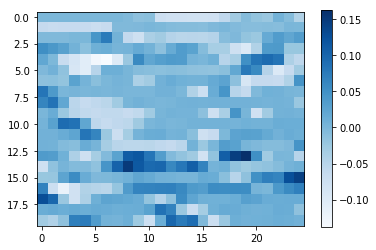

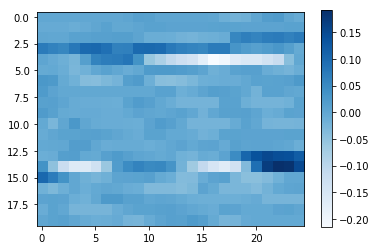

In [76]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=10)

# Apply fit_transform to samples: features
features = model.fit_transform(img)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)